In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os

load_dotenv()

db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')

# Build connection string
db_connection = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(db_connection)

In [2]:
sql_query = """
    SELECT table_name 
    FROM information_schema.tables 
    WHERE table_schema = 'public'
"""
try:
    tables_df = pd.read_sql_query(sql_query, engine)

    print("--- Tables in the PostgreSQL database ---")
    print(tables_df)

except Exception as e:
    print(f" An error occurred: {e}")

--- Tables in the PostgreSQL database ---
        table_name
0    end_inventory
1  purchase_prices
2   vendor_invoice
3  begin_inventory
4        purchases
5            sales


In [3]:
for table in tables_df['table_name']:
    print('-'*20,f'{table}','-'*20)
    print("count of records:",pd.read_sql(f"SELECT COUNT(*) AS count FROM {table}", db_connection)['count'].values[0])
    display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", db_connection))

-------------------- end_inventory --------------------
count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------- purchase_prices --------------------
count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------- vendor_invoice --------------------
count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


-------------------- begin_inventory --------------------
count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------- purchases --------------------
count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------- sales --------------------
count of records: 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [4]:
purchase_prices=pd.read_sql("SELECT * FROM purchase_prices", engine)

In [5]:
vendor_invoice=pd.read_sql("SELECT * FROM vendor_invoice",engine)

In [6]:
purchases=pd.read_sql("SELECT * FROM purchases",engine)

In [7]:
sales=pd.read_sql("SELECT * FROM sales",engine)

In [8]:
begin_inventory=pd.read_sql("SELECT * FROM begin_inventory",engine)
end_inventory=pd.read_sql("SELECT * FROM end_inventory",engine)

Performing Data Quality Checks and understanding the data

In [9]:
purchase_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


In [10]:
purchase_prices[purchase_prices.isnull().any(axis=1)]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,None,0.0,None,None,1,11.19,480,BACARDI USA INC


Brand 4202 from vendor 480 is only listed in PurchasePrices,with Price mentioned 0 and purchaseprice as 11.19

In [11]:
vendor_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [12]:
purchases.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     2372474 non-null  object 
 1   Store           2372474 non-null  int64  
 2   Brand           2372474 non-null  int64  
 3   Description     2372474 non-null  object 
 4   Size            2372471 non-null  object 
 5   VendorNumber    2372474 non-null  int64  
 6   VendorName      2372474 non-null  object 
 7   PONumber        2372474 non-null  int64  
 8   PODate          2372474 non-null  object 
 9   ReceivingDate   2372474 non-null  object 
 10  InvoiceDate     2372474 non-null  object 
 11  PayDate         2372474 non-null  object 
 12  PurchasePrice   2372474 non-null  float64
 13  Quantity        2372474 non-null  int64  
 14  Dollars         2372474 non-null  float64
 15  Classification  2372474 non-null  int64  
dtypes: float64(2), int64(6), object(8)
m

In [13]:
date_cols=['PODate','ReceivingDate','InvoiceDate','PayDate']
for col in date_cols:
    purchases[col]=pd.to_datetime(purchases[col])

In [14]:
sales.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825363 entries, 0 to 12825362
Data columns (total 14 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   InventoryId     12825363 non-null  object 
 1   Store           12825363 non-null  int64  
 2   Brand           12825363 non-null  int64  
 3   Description     12825363 non-null  object 
 4   Size            12825363 non-null  object 
 5   SalesQuantity   12825363 non-null  int64  
 6   SalesDollars    12825363 non-null  float64
 7   SalesPrice      12825363 non-null  float64
 8   SalesDate       12825363 non-null  object 
 9   Volume          12825363 non-null  float64
 10  Classification  12825363 non-null  int64  
 11  ExciseTax       12825363 non-null  float64
 12  VendorNo        12825363 non-null  int64  
 13  VendorName      12825363 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.3+ GB


In [15]:
begin_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [16]:
end_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [17]:
purchases.describe()

,Store,Brand,VendorNumber,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
count,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2372474,2372474,2372474,2372474,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06
mean,4.465133e+01,1.241864e+04,6.886436e+03,1.104094e+04,2024-07-04 13:34:14.973836800,2024-07-12 04:28:06.818400768,2024-07-21 01:24:37.535094528,2024-08-25 17:13:18.406052608,1.205005e+01,1.415585e+01,1.356815e+02,1.443520e+00
min,1.000000e+00,5.800000e+01,2.000000e+00,8.106000e+03,2023-12-20 00:00:00,2024-01-01 00:00:00,2024-01-04 00:00:00,2024-02-04 00:00:00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.500000e+01,3.639000e+03,3.252000e+03,9.761000e+03,2024-04-12 00:00:00,2024-04-20 00:00:00,2024-04-29 00:00:00,2024-06-02 00:00:00,6.120000e+00,6.000000e+00,4.926000e+01,1.000000e+00
50%,4.800000e+01,6.523000e+03,4.425000e+03,1.110300e+04,2024-07-07 00:00:00,2024-07-15 00:00:00,2024-07-25 00:00:00,2024-08-29 00:00:00,9.220000e+00,1.000000e+01,8.393000e+01,1.000000e+00
75%,6.700000e+01,1.887700e+04,9.552000e+03,1.239700e+04,2024-09-30 00:00:00,2024-10-07 00:00:00,2024-10-17 00:00:00,2024-11-24 00:00:00,1.449000e+01,1.200000e+01,1.405200e+02,2.000000e+00
max,8.100000e+01,9.063100e+04,2.013590e+05,1.366100e+04,2024-12-23 00:00:00,2024-12-31 00:00:00,2025-01-10 00:00:00,2025-02-19 00:00:00,5.681810e+03,3.816000e+03,5.017570e+04,2.000000e+00
std,2.351245e+01,1.255728e+04,8.066694e+03,1.565340e+03,NaN,NaN,NaN,NaN,1.794510e+01,2.344616e+01,2.816649e+02,4.967999e-01


In [18]:
purchases[purchases['Dollars']==0].groupby('VendorNumber').size()

VendorNumber
2561    153
dtype: int64

In [19]:
purchases[(purchases['VendorNumber']==2561) & (purchases['Brand']==2166)].describe()

,Store,Brand,VendorNumber,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
count,153.000000,153.0,153.0,153.000000,153,153,153,153,153.0,153.000000,153.0,153.0
mean,48.758170,2166.0,2561.0,12526.209150,2024-10-10 08:47:03.529411840,2024-10-18 01:05:52.941176576,2024-10-27 15:50:35.294117632,2024-12-02 01:05:52.941176576,0.0,13.169935,0.0,1.0
min,1.000000,2166.0,2561.0,11462.000000,2024-08-02 00:00:00,2024-08-08 00:00:00,2024-08-22 00:00:00,2024-09-24 00:00:00,0.0,1.000000,0.0,1.0
25%,34.000000,2166.0,2561.0,11752.000000,2024-08-22 00:00:00,2024-08-30 00:00:00,2024-09-12 00:00:00,2024-10-06 00:00:00,0.0,12.000000,0.0,1.0
50%,50.000000,2166.0,2561.0,12707.000000,2024-10-21 00:00:00,2024-10-26 00:00:00,2024-10-31 00:00:00,2024-12-04 00:00:00,0.0,12.000000,0.0,1.0
75%,68.000000,2166.0,2561.0,13208.000000,2024-11-24 00:00:00,2024-11-28 00:00:00,2024-12-10 00:00:00,2025-01-15 00:00:00,0.0,12.000000,0.0,1.0
max,81.000000,2166.0,2561.0,13506.000000,2024-12-14 00:00:00,2024-12-24 00:00:00,2024-12-28 00:00:00,2025-02-03 00:00:00,0.0,71.000000,0.0,1.0
std,22.654448,0.0,0.0,742.458041,NaN,NaN,NaN,NaN,0.0,7.415126,0.0,0.0


In [20]:
purchases[purchases['VendorNumber']==2561].value_counts('Brand').sum()

np.int64(7081)

In [21]:
153/7081

0.02160711763875159

In [22]:
purchase_prices[(purchase_prices['VendorNumber']==2561) & (purchase_prices['Brand']==2166)]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
10803,2166,The Macallan Double Cask 12,0.0,750mL,750,1,0.0,2561,EDRINGTON AMERICAS


In [23]:
end_inventory[end_inventory['Brand']==2166]

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
352,1_HARDERSFIELD_2166,1,HARDERSFIELD,2166,The Macallan Double Cask 12,750mL,3,54.99,2024-12-31
3504,2_ASHBORNE_2166,2,ASHBORNE,2166,The Macallan Double Cask 12,750mL,0,54.99,2024-12-31
6681,4_EANVERNESS_2166,4,EANVERNESS,2166,The Macallan Double Cask 12,750mL,4,54.99,2024-12-31
11029,6_GOULCREST_2166,6,GOULCREST,2166,The Macallan Double Cask 12,750mL,7,54.99,2024-12-31
14176,7_STANMORE_2166,7,STANMORE,2166,The Macallan Double Cask 12,750mL,11,54.99,2024-12-31
...,...,...,...,...,...,...,...,...,...
205733,75_BARNCOMBE_2166,75,BARNCOMBE,2166,The Macallan Double Cask 12,750mL,0,54.99,2024-12-31
208009,76_DONCASTER_2166,76,DONCASTER,2166,The Macallan Double Cask 12,750mL,1,54.99,2024-12-31
213014,77_TAMWORTH_2166,77,TAMWORTH,2166,The Macallan Double Cask 12,750mL,3,54.99,2024-12-31
217351,79_BALLYMENA_2166,79,BALLYMENA,2166,The Macallan Double Cask 12,750mL,0,54.99,2024-12-31


In [24]:
sales[sales['Brand']==2166]

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
7063302,10_HORNSEY_2166,10,2166,The Macallan Double Cask 12,750mL,1,65.99,65.99,2024-08-31,750.0,1,0.79,2561,EDRINGTON AMERICAS
7131170,15_WANBORNE_2166,15,2166,The Macallan Double Cask 12,750mL,1,65.99,65.99,2024-08-24,750.0,1,0.79,2561,EDRINGTON AMERICAS
7187129,2_ASHBORNE_2166,2,2166,The Macallan Double Cask 12,750mL,1,65.99,65.99,2024-08-29,750.0,1,0.79,2561,EDRINGTON AMERICAS
7237640,23_ARBINGTON_2166,23,2166,The Macallan Double Cask 12,750mL,1,65.99,65.99,2024-08-13,750.0,1,0.79,2561,EDRINGTON AMERICAS
7237641,23_ARBINGTON_2166,23,2166,The Macallan Double Cask 12,750mL,2,131.98,65.99,2024-08-25,750.0,1,1.57,2561,EDRINGTON AMERICAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779175,81_PEMBROKE_2166,81,2166,The Macallan Double Cask 12,750mL,1,54.99,54.99,2024-12-16,750.0,1,0.79,2561,EDRINGTON AMERICAS
12779176,81_PEMBROKE_2166,81,2166,The Macallan Double Cask 12,750mL,2,109.98,54.99,2024-12-24,750.0,1,1.57,2561,EDRINGTON AMERICAS
12808608,9_BLACKPOOL_2166,9,2166,The Macallan Double Cask 12,750mL,4,219.96,54.99,2024-12-23,750.0,1,3.15,2561,EDRINGTON AMERICAS
12808609,9_BLACKPOOL_2166,9,2166,The Macallan Double Cask 12,750mL,1,54.99,54.99,2024-12-24,750.0,1,0.79,2561,EDRINGTON AMERICAS


Brand 2166 by vendor 2561 have purchaseprice mentioned as '0'but price(supplier price) mentioned as 54.99 in onl end_inventory

In [25]:
sales.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07
mean,4.389572e+01,1.215460e+04,2.566623e+00,3.524758e+01,1.569027e+01,9.394389e+02,1.413892e+00,1.479431e+00,7.125907e+03
std,2.353947e+01,1.236843e+04,4.551810e+00,8.835689e+01,1.512728e+01,6.993202e+02,4.925295e-01,4.736633e+00,8.742565e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,2.300000e+01,3.663000e+03,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.000000e+00,2.100000e-01,3.252000e+03
50%,4.700000e+01,6.349000e+03,1.000000e+00,1.899000e+01,1.299000e+01,7.500000e+02,1.000000e+00,7.500000e-01,4.692000e+03
75%,6.600000e+01,1.795400e+04,2.000000e+00,3.499000e+01,1.899000e+01,1.000000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,8.100000e+01,9.063100e+04,1.231000e+03,2.606114e+04,5.799990e+03,2.000000e+04,2.000000e+00,1.260520e+03,2.013590e+05


In [26]:
sales[sales['SalesDollars']==0]

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
1251465,38_GOULCREST_25340,38,25340,Dom La Soumade Rast Prestige,750mL,3,0.0,0.0,2024-02-13,750.0,2,0.34,4425,MARTIGNETTI COMPANIES
1572292,66_EANVERNESS_25340,66,25340,Dom La Soumade Rast Prestige,750mL,3,0.0,0.0,2024-02-12,750.0,2,0.34,4425,MARTIGNETTI COMPANIES
1572293,66_EANVERNESS_25340,66,25340,Dom La Soumade Rast Prestige,750mL,1,0.0,0.0,2024-02-16,750.0,2,0.11,4425,MARTIGNETTI COMPANIES
1602469,67_EANVERNESS_25340,67,25340,Dom La Soumade Rast Prestige,750mL,12,0.0,0.0,2024-02-07,750.0,2,1.35,4425,MARTIGNETTI COMPANIES
1713234,73_DONCASTER_25340,73,25340,Dom La Soumade Rast Prestige,750mL,1,0.0,0.0,2024-02-15,750.0,2,0.11,4425,MARTIGNETTI COMPANIES
3781437,15_WANBORNE_19465,15,19465,Flagstone Longitude Red,750mL,13,0.0,0.0,2024-05-02,750.0,2,1.46,2000,SOUTHERN WINE & SPIRITS NE
3876773,23_ARBINGTON_19465,23,19465,Flagstone Longitude Red,750mL,6,0.0,0.0,2024-05-04,750.0,2,0.68,2000,SOUTHERN WINE & SPIRITS NE
3995647,34_PITMERDEN_19465,34,19465,Flagstone Longitude Red,750mL,1,0.0,0.0,2024-05-02,750.0,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
4251448,54_GUTHRAM_19465,54,19465,Flagstone Longitude Red,750mL,1,0.0,0.0,2024-05-02,750.0,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
4251449,54_GUTHRAM_19465,54,19465,Flagstone Longitude Red,750mL,2,0.0,0.0,2024-05-04,750.0,2,0.22,2000,SOUTHERN WINE & SPIRITS NE


Brands and vendors 25340:4425,19465:2000,3046:3960,3963:8892,19669:9552 have sales dollars and sales price '0'

Removing inconsistencies

In [27]:
# Standardize the column name in Sales
if 'VendorNo' in sales.columns:
    sales = sales.rename(columns={'VendorNo': 'VendorNumber'})
    print("Renamed 'VendorNo' to 'VendorNumber' in Sales table.")


Renamed 'VendorNo' to 'VendorNumber' in Sales table.


In [28]:
#Checking for any inconsistencies in vendor names and vendor number in Sales table
inconsistent_vendornames=sales.groupby(['VendorNumber','VendorName']).size().reset_index().groupby('VendorNumber').size().reset_index(name='count').sort_values(by='count',ascending=False)
inconsistent_vendornames=inconsistent_vendornames[inconsistent_vendornames['count']>1]
inconsistent_vendornames

,VendorNumber,count
19,1587,2
25,2000,2
42,4425,2


In [29]:
ivno=inconsistent_vendornames[inconsistent_vendornames['count']>1]['VendorNumber']
print(ivno)

19    1587
25    2000
42    4425
Name: VendorNumber, dtype: int64


In [30]:
#Detailed view of inconsistent vendor names
vendor_invoice[vendor_invoice['VendorNumber'].isin(ivno)].groupby(['VendorNumber','VendorName']).size().reset_index()

,VendorNumber,VendorName,0
0,1587,VINEYARD BRANDS INC,55
1,1587,VINEYARD BRANDS LLC,3
2,2000,SOUTHERN GLAZERS W&S OF NE,12
3,2000,SOUTHERN WINE & SPIRITS NE,55
4,4425,MARTIGNETTI COMPANIES,55
5,4425,MARTIGNETTI COMPANIES,27


In [31]:
# Gather vendor number and name pairs from ALL 4 tables and stack them
all_vendors_list = [
    vendor_invoice[['VendorNumber', 'VendorName']],
    purchases[['VendorNumber', 'VendorName']],
    purchase_prices[['VendorNumber', 'VendorName']], 
    sales[['VendorNumber', 'VendorName']]
]

# Stack them to create the Universe of Vendors
all_vendors_df = pd.concat(all_vendors_list)

# Create the Master Dictionary Group by ID and pick the most common Name
master_vendor_map = all_vendors_df.groupby('VendorNumber')['VendorName'].agg(lambda x: x.mode()[0]).to_dict()

# Apply the Master Map to fill missing values
sales['Clean_Vendor_Name'] = sales['VendorNumber'].map(master_vendor_map)
purchases['Clean_Vendor_Name'] = purchases['VendorNumber'].map(master_vendor_map)
vendor_invoice['Clean_Vendor_Name'] = vendor_invoice['VendorNumber'].map(master_vendor_map)
purchase_prices['Clean_Vendor_Name'] = purchase_prices['VendorNumber'].map(master_vendor_map)

In [32]:
vendor_invoice[vendor_invoice['VendorNumber'].isin(ivno)].groupby(['VendorNumber','Clean_Vendor_Name']).size().reset_index()

,VendorNumber,Clean_Vendor_Name,0
0,1587,VINEYARD BRANDS INC,58
1,2000,SOUTHERN WINE & SPIRITS NE,67
2,4425,MARTIGNETTI COMPANIES,82


In [33]:
print(f"Unique vendor numbers in vendor_invoice:{vendor_invoice['VendorNumber'].nunique()}")
#print(f"Unique vendor names in vendor_invoice:{vendor_invoice['VendorName'].str.strip().nunique()}")
print(f"Unique cleaned vendor names in vendor_invoice:{vendor_invoice['Clean_Vendor_Name'].str.strip().nunique()}")

Unique vendor numbers in vendor_invoice:126
Unique cleaned vendor names in vendor_invoice:126


In [34]:
print(f"Unique vendor numbers in purchases:{purchases['VendorNumber'].nunique()}")
print(f"Unique cleaned vendor names in purchases:{purchases['Clean_Vendor_Name'].str.strip().nunique()}")

Unique vendor numbers in purchases:126


Unique cleaned vendor names in purchases:126


In [35]:
print(f"Unique vendor numbers in purchase_prices:{purchase_prices['VendorNumber'].nunique()}")
print(f"Unique cleaned vendor names in purchase_prices:{purchase_prices['Clean_Vendor_Name'].str.strip().nunique()}")

Unique vendor numbers in purchase_prices:131
Unique cleaned vendor names in purchase_prices:131


In [36]:
print(f"Unique vendor numbers in sales:{sales['VendorNumber'].nunique()}")
print(f"Unique cleaned vendor names in sales:{sales['Clean_Vendor_Name'].str.strip().nunique()}")

Unique vendor numbers in sales:127
Unique cleaned vendor names in sales:127


In [37]:
unique_v_nos_in_vi = vendor_invoice["VendorNumber"].tolist()
vnumsales_not_in_vi = sales[~sales['VendorNumber'].isin(unique_v_nos_in_vi)]['VendorNumber']
print(f"vendor numbers present in sales but not in vendor invoice {vnumsales_not_in_vi.unique()}")

vendor numbers present in sales but not in vendor invoice [ 9710  1002 90034]


In [38]:
unique_v_nos_in_pu=purchases["VendorNumber"].unique().tolist()
vnumsales_not_in_pu=sales[~sales['VendorNumber'].isin(unique_v_nos_in_pu)]['VendorNumber']
print(f"vendor numbers present in sales but not in purchases {vnumsales_not_in_pu.unique()}")

vendor numbers present in sales but not in purchases [ 9710  1002 90034]


In [39]:
purchase_prices[purchase_prices['VendorNumber'].isin(vnumsales_not_in_pu)]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName,Clean_Vendor_Name
382,2539,John Barr Red Scotch Whisky,19.99,1750mL,1750,1,12.30,9710,WHYTE & MACKAY,WHYTE & MACKAY
7166,4015,Ron Fortuna 8 Yr Old Rum,16.99,750mL,750,1,12.87,1002,BERNIKO LLC,BERNIKO LLC
7641,15625,Mourvedre Bunnell Family,27.99,750mL,750,2,18.54,90034,EXCLUSIVE WINES & SPIRITS,EXCLUSIVE WINES & SPIRITS


Vendors 9710:'WHYTE & MACKAY' , 1002:'BERNIKO LLC' and 90034:'EXCLUSIVE WINES & SPIRITS' are listed in purchase prices and are sold but not listed in vendor invoice and purchases

In [40]:
unique_v_nos_in_pp=purchase_prices["VendorNumber"].unique().tolist()
vnumsales_not_in_pp=sales[~sales['VendorNumber'].isin(unique_v_nos_in_pp)]['VendorNumber']
print(f"vendor numbers present in sales but not in purchase_prices {vnumsales_not_in_pp.unique()}")

vendor numbers present in sales but not in purchase_prices [201359]


In [41]:
vendor_invoice[vendor_invoice['VendorNumber'].isin(vnumsales_not_in_pp)]

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,Clean_Vendor_Name
3951,201359,FLAVOR ESSENCE INC,2024-10-04,12061,2024-09-12,2024-11-11,1,17.0,0.09,None,FLAVOR ESSENCE INC


In [42]:
purchases[purchases['VendorNumber'].isin(vnumsales_not_in_pp)]

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,Clean_Vendor_Name
1659444,67_EANVERNESS_90609,67,90609,Flavor Essence Variety 5 Pak,5/2 oz,201359,FLAVOR ESSENCE INC,12061,2024-09-12,2024-09-25,2024-10-04,2024-11-11,17.0,1,17.0,2,FLAVOR ESSENCE INC


Vendor 201359:'FLAVOR ESSENCE INC' is listed in VendorInvoice, purchases ans sales table i.e sold, but not listed in purchase prices table

In [43]:
purchases_uniq_no=purchases['VendorNumber'].unique().tolist()
pp_uniq_no=purchase_prices['VendorNumber'].unique().tolist()
vnumpp_not_in_pu=purchase_prices[~purchase_prices['VendorNumber'].isin(purchases_uniq_no)]
print(f"Vendors listed in purchase prices but not in purchases{vnumpp_not_in_pu['VendorNumber'].unique()}")

Vendors listed in purchase prices but not in purchases[ 9710  5895  3670  1002  2973 90034]


In [44]:
vnumpp_not_in_pu

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName,Clean_Vendor_Name
382,2539,John Barr Red Scotch Whisky,19.99,1750mL,1750,1,12.30,9710,WHYTE & MACKAY,WHYTE & MACKAY
543,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc.","Mizkan Americas, Inc."
5019,3339,Halo Vodka,19.99,750mL,750,1,15.62,3670,HALO DISTILLERY,HALO DISTILLERY
7166,4015,Ron Fortuna 8 Yr Old Rum,16.99,750mL,750,1,12.87,1002,BERNIKO LLC,BERNIKO LLC
7631,8263,Diep 9 Passion Fruit,9.99,750mL,750,1,7.46,2973,FLEMISH LION LLC,FLEMISH LION LLC
7641,15625,Mourvedre Bunnell Family,27.99,750mL,750,2,18.54,90034,EXCLUSIVE WINES & SPIRITS,EXCLUSIVE WINES & SPIRITS


In [45]:
vnumpp_not_in_pu['VendorNumber'].to_list()

[9710, 5895, 3670, 1002, 2973, 90034]

Vendors:
'9710':'WHYTE & MACKAY'   '5895':'Mizkan Americas, Inc.'
'3670':'HALO DISTILLERY'  '1002':'BERNIKO LLC'
'2973':'FLEMISH LION LLC' '90034':'EXCLUSIVE WINES & SPIRITS' are only listed in PurchasePrices but neither in Purchases nor in VendorInvoice but 9710,1002 and 90034 are listed in Sales

In [46]:
sales_uniq_no=sales['VendorNumber'].unique().tolist()
pp_uniq_no=purchase_prices['VendorNumber'].unique().tolist()
vnumpp_not_in_sales=purchase_prices[~purchase_prices['VendorNumber'].isin(sales_uniq_no)]
print(f"Vendors listed in purchase prices but not in sales{vnumpp_not_in_sales['VendorNumber'].unique()}")


Vendors listed in purchase prices but not in sales[5895 3670 4901 2973   54]


In [47]:
vnumpp_not_in_sales['VendorNumber'].to_list()

[5895, 3670, 4901, 2973, 4901, 54]

In [48]:
vendor_invoice[vendor_invoice['VendorNumber'].isin(vnumpp_not_in_sales['VendorNumber'].to_list())]

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,Clean_Vendor_Name
4069,4901,LAUREATE IMPORTS CO,2024-10-10,12170,2024-09-19,2024-11-20,29,140.94,0.72,None,LAUREATE IMPORTS CO
5015,54,AAPER ALCOHOL & CHEMICAL CO,2024-12-06,13168,2024-11-22,2025-01-18,1,105.07,0.48,None,AAPER ALCOHOL & CHEMICAL CO


In [49]:
purchases[purchases['VendorNumber'].isin(vnumpp_not_in_sales['VendorNumber'].to_list())]

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,Clean_Vendor_Name
1711397,59_CLAETHORPES_6342,59,6342,Avia Slovenia Chard,1.5L,4901,LAUREATE IMPORTS CO,12170,2024-09-19,2024-09-29,2024-10-10,2024-11-20,4.86,29,140.94,2,LAUREATE IMPORTS CO
2103342,74_PAENTMARWY_990,74,990,Ethyl Alcohol 200 Proof,128.0 Gal,54,AAPER ALCOHOL & CHEMICAL CO,13148,2024-11-21,2024-12-01,2024-12-08,2025-01-21,105.07,1,105.07,1,AAPER ALCOHOL & CHEMICAL CO


Vendors 4901:'LAUREATE IMPORTS CO' and 54:'AAPER ALCOHOL & CHEMICAL CO' 's products are not sold 

Vendors 5895:'Mizkan Americas, Inc.      ', 3670:'HALO DISTILLERY            ', 2973:'FLEMISH LION LLC           ' are only listed in purchaseprices but neither purchased, listed in VendorInvoice nor sold

In [50]:
purchase_prices[purchase_prices['VendorNumber'].isin(vnumpp_not_in_sales['VendorNumber'].unique())]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName,Clean_Vendor_Name
543,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc.","Mizkan Americas, Inc."
5019,3339,Halo Vodka,19.99,750mL,750,1,15.62,3670,HALO DISTILLERY,HALO DISTILLERY
5900,6286,Avia Zinfany Slovenia,3.99,750mL,750,2,2.70,4901,LAUREATE IMPORTS CO,LAUREATE IMPORTS CO
7631,8263,Diep 9 Passion Fruit,9.99,750mL,750,1,7.46,2973,FLEMISH LION LLC,FLEMISH LION LLC
10906,6342,Avia Slovenia Chard,7.49,1500mL,1500,2,4.86,4901,LAUREATE IMPORTS CO,LAUREATE IMPORTS CO
11799,990,Ethyl Alcohol 200 Proof,134.49,3750mL,3750,1,105.07,54,AAPER ALCOHOL & CHEMICAL CO,AAPER ALCOHOL & CHEMICAL CO


In [51]:
purchases[purchases['VendorNumber']==201359]

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,Clean_Vendor_Name
1659444,67_EANVERNESS_90609,67,90609,Flavor Essence Variety 5 Pak,5/2 oz,201359,FLAVOR ESSENCE INC,12061,2024-09-12,2024-09-25,2024-10-04,2024-11-11,17.0,1,17.0,2,FLAVOR ESSENCE INC


In [52]:
sales[sales['VendorNumber']==201359]

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNumber,VendorName,Clean_Vendor_Name
6190385,34_PITMERDEN_90609,34,90609,Flavor Essence Variety 5 Pak,5/2 oz,1,24.99,24.99,2024-07-17,162.5,2,0.02,201359,FLAVOR ESSENCE INC,FLAVOR ESSENCE INC
6251628,38_GOULCREST_90609,38,90609,Flavor Essence Variety 5 Pak,5/2 oz,1,24.99,24.99,2024-07-18,162.5,2,0.02,201359,FLAVOR ESSENCE INC,FLAVOR ESSENCE INC
6571639,6_GOULCREST_90609,6,90609,Flavor Essence Variety 5 Pak,5/2 oz,1,24.99,24.99,2024-07-03,162.5,2,0.02,201359,FLAVOR ESSENCE INC,FLAVOR ESSENCE INC
6736724,67_EANVERNESS_90609,67,90609,Flavor Essence Variety 5 Pak,5/2 oz,1,24.99,24.99,2024-07-07,162.5,2,0.02,201359,FLAVOR ESSENCE INC,FLAVOR ESSENCE INC
6736725,67_EANVERNESS_90609,67,90609,Flavor Essence Variety 5 Pak,5/2 oz,2,49.98,24.99,2024-07-11,162.5,2,0.05,201359,FLAVOR ESSENCE INC,FLAVOR ESSENCE INC
6736726,67_EANVERNESS_90609,67,90609,Flavor Essence Variety 5 Pak,5/2 oz,1,24.99,24.99,2024-07-19,162.5,2,0.02,201359,FLAVOR ESSENCE INC,FLAVOR ESSENCE INC
6890160,73_DONCASTER_90609,73,90609,Flavor Essence Variety 5 Pak,5/2 oz,1,24.99,24.99,2024-07-27,162.5,2,0.02,201359,FLAVOR ESSENCE INC,FLAVOR ESSENCE INC
6975330,76_DONCASTER_90609,76,90609,Flavor Essence Variety 5 Pak,5/2 oz,1,24.99,24.99,2024-07-02,162.5,2,0.02,201359,FLAVOR ESSENCE INC,FLAVOR ESSENCE INC
6975331,76_DONCASTER_90609,76,90609,Flavor Essence Variety 5 Pak,5/2 oz,2,49.98,24.99,2024-07-17,162.5,2,0.05,201359,FLAVOR ESSENCE INC,FLAVOR ESSENCE INC
6975332,76_DONCASTER_90609,76,90609,Flavor Essence Variety 5 Pak,5/2 oz,2,49.98,24.99,2024-07-24,162.5,2,0.05,201359,FLAVOR ESSENCE INC,FLAVOR ESSENCE INC


In [53]:
purchases[purchases['Brand']==2166]

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,Clean_Vendor_Name
1369009,59_CLAETHORPES_2166,59,2166,The Macallan Double Cask 12,750mL,2561,EDRINGTON AMERICAS,11462,2024-08-02,2024-08-10,2024-08-22,2024-10-01,0.0,12,0.0,1,EDRINGTON AMERICAS
1369018,38_GOULCREST_2166,38,2166,The Macallan Double Cask 12,750mL,2561,EDRINGTON AMERICAS,11462,2024-08-02,2024-08-11,2024-08-22,2024-10-01,0.0,12,0.0,1,EDRINGTON AMERICAS
1369031,34_PITMERDEN_2166,34,2166,The Macallan Double Cask 12,750mL,2561,EDRINGTON AMERICAS,11462,2024-08-02,2024-08-09,2024-08-22,2024-10-01,0.0,12,0.0,1,EDRINGTON AMERICAS
1369032,44_PORTHCRAWL_2166,44,2166,The Macallan Double Cask 12,750mL,2561,EDRINGTON AMERICAS,11462,2024-08-02,2024-08-08,2024-08-22,2024-10-01,0.0,12,0.0,1,EDRINGTON AMERICAS
1369033,56_BEGGAR'S HOLE_2166,56,2166,The Macallan Double Cask 12,750mL,2561,EDRINGTON AMERICAS,11462,2024-08-02,2024-08-09,2024-08-22,2024-10-01,0.0,12,0.0,1,EDRINGTON AMERICAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278896,39_EASTHALLOW_2166,39,2166,The Macallan Double Cask 12,750mL,2561,EDRINGTON AMERICAS,13506,2024-12-14,2024-12-19,2024-12-28,2025-02-03,0.0,12,0.0,1,EDRINGTON AMERICAS
2278909,38_GOULCREST_2166,38,2166,The Macallan Double Cask 12,750mL,2561,EDRINGTON AMERICAS,13506,2024-12-14,2024-12-20,2024-12-28,2025-02-03,0.0,10,0.0,1,EDRINGTON AMERICAS
2278922,9_BLACKPOOL_2166,9,2166,The Macallan Double Cask 12,750mL,2561,EDRINGTON AMERICAS,13506,2024-12-14,2024-12-19,2024-12-28,2025-02-03,0.0,12,0.0,1,EDRINGTON AMERICAS
2278954,20_BREDWARDINE_2166,20,2166,The Macallan Double Cask 12,750mL,2561,EDRINGTON AMERICAS,13506,2024-12-14,2024-12-19,2024-12-28,2025-02-03,0.0,12,0.0,1,EDRINGTON AMERICAS


Legacy Vendors (Sales Only): 9701 (Whyte & Mackay), 1002 (Berniko LLC), 90034 (Exclusive Wines). These vendors generated revenue from existing stock but had no new purchases or invoices in the current period.

Maverick Vendor (Missing Master Data): 201359 (Flavor Essence Inc.) This vendor has active purchases and sales but is missing from the master PurchasePrices list, requiring data imputation.

Dead Stock (No Sales): 4901(Laureate Imports), 54(Aaper Alcohol). Inventory was purchased and paid for, but zero units were sold, representing a capital risk.

Inactive: 5895 (Mizkan), 3670 (Halo Distillery), 2973 (Flemish Lion). These vendors appear in the price catalog but had no transaction activity (no buys or sales).

In [54]:
sql_query="""
WITH brand_fallbacks AS (
    SELECT 
        --Clean the key to ensure it matches
        TRIM(CAST("Brand" AS TEXT)) as "Brand_Clean", 
        AVG("Price") as "inventory_backup_price"
    FROM end_inventory
    WHERE "Price" > 0
    GROUP BY 1
),

purchases_with_clean_prices AS (
    SELECT 
        p.*,
        
        -- FIX 2: The Priority Logic
        COALESCE(
            -- Option A: Original Price (If valid)
            NULLIF(p."PurchasePrice", 0),
            
            -- Option B: Inventory Backup (The 54.99)
            b."inventory_backup_price",
            
            -- Option C: Calculate from Dollars (Prevent Division by Zero)
            CASE 
                WHEN p."Quantity" > 0 AND p."Dollars" > 0 
                THEN p."Dollars" / p."Quantity" 
            END
        ) AS "PurchasePrice_Clean",
        
        -- Metadata
        CASE 
            WHEN NULLIF(p."PurchasePrice", 0) IS NOT NULL THEN 'Original'
            WHEN b."inventory_backup_price" IS NOT NULL THEN 'End_Inventory' 
            ELSE 'Calculated/Missing'
        END AS "PriceSource",
        
        CASE WHEN p."PurchasePrice" IS NULL OR p."PurchasePrice" = 0 THEN TRUE ELSE FALSE END AS "Price_Was_Imputed"

    FROM purchases p
    -- FIX 3: Robust Join (Handles spaces and type mismatches)
    LEFT JOIN brand_fallbacks b 
        ON TRIM(CAST(p."Brand" AS TEXT)) = b."Brand_Clean"
),

-- 1. Summarize Invoices
invoice_stats AS (
    SELECT 
        "VendorNumber",  
        MAX("VendorName") AS "VendorName_Inv",
        SUM("Quantity") AS "Total_Purchased_Quantity_Inv",
        SUM("Dollars") AS "Total_Vendor_Spend_Inv",
        SUM("Freight") AS "Total_Vendor_Freight"
    FROM vendor_invoice 
    GROUP BY "VendorNumber"
),

-- 2. Summarize Sales
sales_stats AS (
    SELECT 
        "VendorNo" AS "VendorNumber",
        TRIM(CAST("Brand" AS TEXT)) AS "Brand_Clean", -- Align Brand Key
        MAX("Description") AS "Description",
        MAX("VendorName") AS "VendorName_Sales",
        SUM("SalesDollars") AS "Total_Sales_Revenue",
        SUM("SalesQuantity") AS "Total_Sales_Quantity",
        SUM("Volume") AS "Total_Volume_Sold",
        SUM("ExciseTax") AS "Total_Tax",
        COUNT(*) AS "Transaction_Count"
    FROM sales
    GROUP BY 1, 2
),

-- 3. Summarize Purchases (Aggregating the Cleaned Data)
purch_stats AS (
    SELECT 
        "VendorNumber",
        TRIM(CAST("Brand" AS TEXT)) AS "Brand_Clean", -- Align Brand Key
        MAX("Description") AS "Description_Purch",
        MAX("VendorName") AS "VendorName_Purch",
        SUM("Dollars") AS "Brand_Total_Cost",
        SUM("Quantity") AS "Brand_Purchased_Qty",
        AVG("PurchasePrice_Clean") AS "Avg_Purchase_Price_Clean",
        COUNT(*) AS "Total_Purchase_Records",
        SUM(CASE WHEN "Price_Was_Imputed" THEN 1 ELSE 0 END) AS "Imputed_Price_Records",
        MODE() WITHIN GROUP (ORDER BY "PriceSource") AS "Primary_Price_Source"
    FROM purchases_with_clean_prices  
    GROUP BY 1, 2
)

-- 4. Final Report
SELECT 
    COALESCE(s."VendorNumber", p."VendorNumber") AS "VendorNumber",
    TRIM(COALESCE(pp."VendorName", s."VendorName_Sales", p."VendorName_Purch", i."VendorName_Inv", 'Unknown Vendor')) AS "VendorName",
    COALESCE(s."Brand_Clean", p."Brand_Clean") AS "Brand",
    COALESCE(s."Description", p."Description_Purch") AS "Description",

    -- Sales Metrics
    COALESCE(s."Total_Sales_Revenue", 0) AS "Total_Sales_Revenue",
    COALESCE(s."Total_Sales_Quantity", 0) AS "Total_Sales_Quantity",
    COALESCE(s."Transaction_Count", 0) AS "Sales_Transaction_Count",
    
    -- Actual Average Selling Price
    CASE 
        WHEN COALESCE(s."Total_Sales_Quantity", 0) > 0 
        THEN ROUND((s."Total_Sales_Revenue" / s."Total_Sales_Quantity")::NUMERIC, 2)
        ELSE NULL
    END AS "Actual_Avg_Selling_Price",
    -- Revenue per Transaction
    CASE 
        WHEN COALESCE(s."Transaction_Count", 0) > 0 
        THEN ROUND((s."Total_Sales_Revenue" / s."Transaction_Count")::NUMERIC, 2)
        ELSE NULL
    END AS "Revenue_Per_Transaction",
    
    -- Procurement Metrics
    COALESCE(p."Brand_Total_Cost", 0) AS "Brand_Total_Cost",
    COALESCE(p."Brand_Purchased_Qty", 0) AS "Total_Purchased_Quantity",

    -- *** PRICE STRUCTURE (Including the Global Fallback) ***
    COALESCE(
        NULLIF(pp."PurchasePrice", 0), 
        p."Avg_Purchase_Price_Clean",
        bf."inventory_backup_price"
    ) AS "Purchase_Price",

    -- MSRP 
    COALESCE(pp."Price", 0) AS "Retail_Price_MSRP",

    -- Vendor Overheads
    COALESCE(i."Total_Vendor_Spend_Inv", 0) AS "Total_Vendor_Spend_Inv",
    COALESCE(i."Total_Vendor_Freight", 0) AS "Total_Vendor_Freight",
    COALESCE(s."Total_Tax", 0) AS "Total_Tax",
    
    -- Price Data Quality Metrics

    COALESCE(p."Total_Purchase_Records", 0) AS "Purchase_Record_Count",
    COALESCE(p."Imputed_Price_Records", 0) AS "Imputed_Price_Count",
    COALESCE(p."Primary_Price_Source", 'N/A') AS "Price_Data_Source",
    
-- *** PROFIT CALCULATIONS ***
-- 1. True COGS
CASE 
    WHEN COALESCE(s."Total_Sales_Quantity", 0) > 0 
    THEN ROUND(
        (s."Total_Sales_Quantity" * COALESCE(
             NULLIF(pp."PurchasePrice", 0), 
             p."Avg_Purchase_Price_Clean", 
             bf."inventory_backup_price"  
         ))::NUMERIC, 2)
    ELSE NULL
END AS "Est_Cost_Of_Goods_Sold",

-- 2. True Gross Profit
CASE
    WHEN COALESCE(s."Total_Sales_Quantity", 0) > 0 
    THEN ROUND(
        (COALESCE(s."Total_Sales_Revenue", 0) - 
         (s."Total_Sales_Quantity" * COALESCE(
             NULLIF(pp."PurchasePrice", 0), 
             p."Avg_Purchase_Price_Clean", 
             bf."inventory_backup_price"
          )))::NUMERIC, 2)
    ELSE NULL
END AS "Gross_Profit",

-- 3. Margin %
CASE 
    WHEN COALESCE(s."Total_Sales_Revenue", 0) > 0 
    THEN ROUND(
        ((COALESCE(s."Total_Sales_Revenue", 0) - 
          (s."Total_Sales_Quantity" * COALESCE(
             NULLIF(pp."PurchasePrice", 0), 
             p."Avg_Purchase_Price_Clean", 
             bf."inventory_backup_price"
           ))) 
          / s."Total_Sales_Revenue" * 100)::NUMERIC, 2)
    ELSE NULL
END AS "Gross_Margin_Pct_Real",

--Freight and Landed Cost
CASE
    WHEN COALESCE(s."Total_Sales_Quantity", 0) > 0 
         AND COALESCE(p."Avg_Purchase_Price_Clean", 0) > 0
         AND COALESCE(p."Brand_Purchased_Qty", 0) > 0
         AND COALESCE(i."Total_Vendor_Freight", 0) > 0
    THEN ROUND(
        (s."Total_Sales_Quantity" * 
         (p."Avg_Purchase_Price_Clean" + 
          (i."Total_Vendor_Freight" / p."Brand_Purchased_Qty")))::NUMERIC, 
        2
    )
    ELSE NULL
END AS "Total_Landed_Cost",

-- Sell-Through Rate
CASE 
    WHEN COALESCE(p."Brand_Purchased_Qty", 0) > 0 
    THEN ROUND(
        COALESCE(s."Total_Sales_Quantity", 0)::NUMERIC / p."Brand_Purchased_Qty", 
        2
     )
    ELSE NULL
END AS "Sell_Through_Rate"

FROM sales_stats s
FULL OUTER JOIN purch_stats p 
    ON s."VendorNumber" = p."VendorNumber" 
    AND s."Brand_Clean" = p."Brand_Clean"
LEFT JOIN purchase_prices pp 
    ON COALESCE(s."Brand_Clean", p."Brand_Clean") = TRIM(CAST(pp."Brand" AS TEXT)) -- Cast here too
    AND COALESCE(s."VendorNumber", p."VendorNumber") = pp."VendorNumber" 
LEFT JOIN invoice_stats i 
    ON COALESCE(s."VendorNumber", p."VendorNumber") = i."VendorNumber"
-- GLOBAL JOIN (to catch the Zombie Row)
LEFT JOIN brand_fallbacks bf 
    ON COALESCE(s."Brand_Clean", p."Brand_Clean") = bf."Brand_Clean"

WHERE COALESCE(s."VendorNumber", p."VendorNumber") IS NOT NULL
ORDER BY "Gross_Profit" DESC NULLS LAST;
"""
vendor_performance_summary = pd.read_sql_query(text(sql_query), engine)

In [55]:
vendor_performance_summary

,VendorNumber,VendorName,Brand,Description,Total_Sales_Revenue,Total_Sales_Quantity,Sales_Transaction_Count,Actual_Avg_Selling_Price,Revenue_Per_Transaction,Brand_Total_Cost,...,Total_Vendor_Freight,Total_Tax,Purchase_Record_Count,Imputed_Price_Count,Price_Data_Source,Est_Cost_Of_Goods_Sold,Gross_Profit,Gross_Margin_Pct_Real,Total_Landed_Cost,Sell_Through_Rate
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,5101919.51,142049.0,18569,35.92,274.75,3811251.60,...,68601.68,260999.20,6584,0,Original,3731627.23,1370292.28,26.86,3798795.69,0.98
1,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,4223107.62,135838.0,17372,31.09,243.10,3023206.01,...,257032.07,249587.83,6326,0,Original,2973493.82,1249613.80,29.59,3226299.37,0.98
2,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,4475972.88,200412.0,18399,22.33,243.27,3261197.94,...,257032.07,368242.80,6774,0,Original,3240662.04,1235310.84,27.60,3496075.57,0.99
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,4538120.60,187140.0,18835,24.25,240.94,3418303.68,...,123780.22,343854.07,7359,0,Original,3413433.60,1124687.00,24.78,3537037.47,1.00
4,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,4819073.49,160247.0,18523,30.07,260.17,3804041.22,...,144929.24,294438.66,6506,0,Original,3716127.93,1102945.56,22.89,3857707.78,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,7153,PINE STATE TRADING CO,14647,Tierra Divina Malbec,0.00,0.0,0,NaN,NaN,155.04,...,15884.82,0.00,1,0,Original,NaN,NaN,NaN,NaN,0.00
11446,3252,E & J GALLO WINERY,39592,Redwood Creek Pnt Nr Calif,0.00,0.0,0,NaN,NaN,103.44,...,61966.91,0.00,1,0,Original,NaN,NaN,NaN,NaN,0.00
11447,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,0.00,0.0,0,NaN,NaN,105.07,...,0.48,0.00,1,0,Original,NaN,NaN,NaN,NaN,0.00
11448,90047,CRUSH WINES,16664,Eden Northern Spy 09 Cider,0.00,0.0,0,NaN,NaN,80.52,...,1457.73,0.00,1,0,Original,NaN,NaN,NaN,NaN,0.00


In [56]:
vendor_performance_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11450 entries, 0 to 11449
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   VendorNumber              11450 non-null  int64  
 1   VendorName                11450 non-null  object 
 2   Brand                     11450 non-null  object 
 3   Description               11450 non-null  object 
 4   Total_Sales_Revenue       11450 non-null  float64
 5   Total_Sales_Quantity      11450 non-null  float64
 6   Sales_Transaction_Count   11450 non-null  int64  
 7   Actual_Avg_Selling_Price  11272 non-null  float64
 8   Revenue_Per_Transaction   11272 non-null  float64
 9   Brand_Total_Cost          11450 non-null  float64
 10  Total_Purchased_Quantity  11450 non-null  float64
 11  Purchase_Price            11450 non-null  float64
 12  Retail_Price_MSRP         11450 non-null  float64
 13  Total_Vendor_Spend_Inv    11450 non-null  float64
 14  Total_

In [57]:
vendor_performance_summary.describe()

,VendorNumber,Total_Sales_Revenue,Total_Sales_Quantity,Sales_Transaction_Count,Actual_Avg_Selling_Price,Revenue_Per_Transaction,Brand_Total_Cost,Total_Purchased_Quantity,Purchase_Price,Retail_Price_MSRP,Total_Vendor_Spend_Inv,Total_Vendor_Freight,Total_Tax,Purchase_Record_Count,Imputed_Price_Count,Est_Cost_Of_Goods_Sold,Gross_Profit,Gross_Margin_Pct_Real,Total_Landed_Cost,Sell_Through_Rate
count,11450.000000,1.145000e+04,11450.000000,11450.000000,11272.000000,11272.000000,1.145000e+04,11450.000000,11450.000000,11450.000000,1.145000e+04,11450.000000,11450.000000,11450.000000,11450.000000,1.127200e+04,1.127200e+04,11272.000000,1.051500e+04,10693.000000
mean,10711.280873,3.948148e+04,2874.923668,1120.119039,34.734866,78.171036,2.811360e+04,2933.133362,24.952774,36.469243,1.194859e+07,61223.152448,1657.138929,207.202969,0.013362,2.781065e+04,1.229429e+04,31.726923,1.405357e+05,1.706774
std,18829.563193,1.623437e+05,10611.388927,2449.247537,132.100439,344.487956,1.191595e+05,10749.887064,112.107322,152.009483,1.190821e+07,60946.016263,10615.153793,567.915276,1.429844,1.180302e+05,4.656565e+04,9.305823,5.033452e+05,6.020198
min,2.000000,0.000000e+00,0.000000,0.000000,0.490000,0.490000,0.000000e+00,0.000000,0.360000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,7.200000e-01,-2.476239e+04,-174.580000,9.090000e+00,0.000000
25%,3960.000000,5.299225e+02,24.000000,10.000000,10.490000,20.020000,2.978700e+02,24.000000,6.890000,10.990000,2.816662e+06,14069.870000,3.560000,2.000000,0.000000,3.844800e+02,1.764000e+02,28.280000,1.870872e+04,0.810000
50%,7153.000000,3.999295e+03,185.000000,94.000000,15.935000,31.730000,2.771395e+03,188.000000,10.660000,15.990000,9.916770e+06,50293.620000,33.600000,15.000000,0.000000,2.925130e+03,1.195230e+03,32.890000,5.875932e+04,0.980000
75%,9552.000000,2.478628e+04,1677.500000,948.000000,28.990000,60.772500,1.845028e+04,1732.000000,19.990000,29.990000,1.557392e+07,79528.990000,352.887500,145.000000,0.000000,1.762931e+04,8.001362e+03,35.370000,1.368338e+05,1.040000
max,201359.000000,5.101920e+06,334939.000000,21984.000000,5799.990000,25196.400000,3.811252e+06,337660.000000,5681.810000,7499.990000,5.095980e+07,257032.070000,368242.800000,7359.000000,153.000000,3.731627e+06,1.370292e+06,83.400000,1.957490e+07,274.500000


In [58]:
# Filter to clean, active products only
df_clean = vendor_performance_summary[
    (vendor_performance_summary['Total_Purchased_Quantity'] > 0) &  
    (vendor_performance_summary['Total_Sales_Quantity'] > 0) ]
#Dormant SKUs
dormant_mask = (
    (vendor_performance_summary['Total_Purchased_Quantity'] == 0) & 
    (vendor_performance_summary['Total_Sales_Quantity'] == 0)
)

df_dormant = vendor_performance_summary[dormant_mask].copy()
# Analyze the "One-Sided" Activity
df_onesided = vendor_performance_summary[
    (vendor_performance_summary['Total_Purchased_Quantity'] == 0) | 
    (vendor_performance_summary['Total_Sales_Quantity'] == 0)
].copy()

# Bucket 1: The Dead Risks (We bought them, but ZERO sales)
# These are dangerous. We spent money and got nothing back.
zero_sales = df_onesided[
    (df_onesided['Total_Purchased_Quantity'] > 0) & 
    (df_onesided['Total_Sales_Quantity'] == 0)
]

# Bucket 2: The Old Inventory (We sold them, but ZERO buys)
# These are good. We are clearing out old stock without spending new money.
pure_sales = df_onesided[
    (df_onesided['Total_Purchased_Quantity'] == 0) & 
    (df_onesided['Total_Sales_Quantity'] > 0)
]

print(f"--- DATA CLEANING SUMMARY ---")
print(f"Total Original Records:   {len(vendor_performance_summary):,}")
print(f"Dormant SKUs Removed:     {len(df_dormant):,}  (No Buys, No Sales)")
print(f"Total One-Sided Records: {len(df_onesided)} ")
print(f"Non Moving Inventory (Zero Sales): {len(zero_sales)} ")
print(f"Depletion Inventory (Zero Buys):  {len(pure_sales)} ")
print(f"Clean Records Remaining:  {len(df_clean):,}")


--- DATA CLEANING SUMMARY ---
Total Original Records:   11,450
Dormant SKUs Removed:     0  (No Buys, No Sales)
Total One-Sided Records: 935 
Non Moving Inventory (Zero Sales): 178 
Depletion Inventory (Zero Buys):  757 
Clean Records Remaining:  10,515


In [ ]:
# Create a working copy
inventory_metrics = df_clean.copy()

# ABC Analysis

# Sort by Revenue (High to Low) to find the "Vital Few"
inventory_metrics = inventory_metrics.sort_values('Total_Sales_Revenue', ascending=False)

# Calculate Cumulative Revenue %
inventory_metrics['cumulative_revenue'] = inventory_metrics['Total_Sales_Revenue'].cumsum()
inventory_metrics['revenue_percent_total'] = (
    inventory_metrics['cumulative_revenue'] / 
    inventory_metrics['Total_Sales_Revenue'].sum()
)

# Apply the 80/20 Rule
def classify_revenue_tier(percent):
    if percent <= 0.80: return 'A_Tier'     
    elif percent <= 0.95: return 'B_Tier'    
    else: return 'C_Tier'                    

inventory_metrics['revenue_category'] = inventory_metrics['revenue_percent_total'].apply(classify_revenue_tier)

# Group by Tier to see the Count vs. Value split
abc_summary = inventory_metrics.groupby('revenue_category').agg(
    SKU_Count=('Total_Sales_Revenue', 'count'),
    Total_Revenue=('Total_Sales_Revenue', 'sum')
)

# Calculate Percentages to verify the theory
total_skus = len(inventory_metrics)
total_revenue = inventory_metrics['Total_Sales_Revenue'].sum()

abc_summary['%_of_SKUs'] = (abc_summary['SKU_Count'] / total_skus) * 100
abc_summary['%_of_Revenue'] = (abc_summary['Total_Revenue'] / total_revenue) * 100

# Format for professional display
pd.options.display.float_format = '{:,.1f}'.format
print("--- ABC ANALYSIS VERIFICATION ---")
print(abc_summary[['SKU_Count', '%_of_SKUs', 'Total_Revenue', '%_of_Revenue']])


# Calculate Velocity for context
inventory_metrics['sell_through_rate'] = (
    inventory_metrics['Total_Sales_Quantity'] / 
    inventory_metrics['Total_Purchased_Quantity']
).clip(upper=1.0)

def recommend_action(row):
    tier = row['revenue_category']
    velocity = row['sell_through_rate']
    
    # LOGIC:
    # A-Items: Focus on avoiding stockouts (Restock) or overstocking expensive items (Review)
    # C-Items: Focus on clearing space (Liquidate) or automation
    
    if tier == 'A_Tier':
        return 'Priority_Restock' if velocity > 0.8 else 'Maintain_Stock'
    elif tier == 'C_Tier':
        return 'Liquidate_Discontinue' if velocity < 0.2 else 'Auto_Replenish'
    else:
        return 'Standard_Review'

inventory_metrics['recommended_action'] = inventory_metrics.apply(recommend_action, axis=1)

print("\n--- RECOMMENDED ACTIONS ---")
print(inventory_metrics['recommended_action'].value_counts())

--- ABC ANALYSIS VERIFICATION ---
                  SKU_Count  %_of_SKUs  Total_Revenue  %_of_Revenue
revenue_category                                                   
A_Tier                 1576       15.0  361,372,032.0          80.0
B_Tier                 2094       19.9   67,753,876.3          15.0
C_Tier                 6845       65.1   22,592,521.1           5.0

--- RECOMMENDED ACTIONS ---
recommended_action
Auto_Replenish           6463
Standard_Review          2094
Priority_Restock         1548
Liquidate_Discontinue     382
Maintain_Stock             28
Name: count, dtype: int64


Summarising timeline of product

In [101]:
inventory_query = """
WITH 
-- Calculate actual date range
date_range AS (
    SELECT 
        MIN("SalesDate"::DATE) AS period_start,
        MAX("SalesDate"::DATE) AS period_end,
        (MAX("SalesDate"::DATE) - MIN("SalesDate"::DATE))::NUMERIC AS actual_days
    FROM sales
),

vendor_metrics AS (
    SELECT 
        p."Brand",
        MAX(p."VendorName") AS "Vendor_Name",
        AVG(("PayDate"::DATE - "InvoiceDate"::DATE)::NUMERIC) AS "DPO_Days",
        SUM("Quantity" * "PurchasePrice") / NULLIF(SUM("Quantity"), 0) AS "Weighted_Unit_Cost"
    FROM purchases p
    WHERE "PayDate" IS NOT NULL AND "InvoiceDate" IS NOT NULL
    GROUP BY p."Brand"
),

brand_sales AS (
    SELECT 
        s."Brand",
        SUM(s."SalesQuantity") AS "Total_Units_Sold",
        SUM(s."SalesDollars") AS "Total_Revenue",
        SUM(s."SalesQuantity" * vm."Weighted_Unit_Cost") AS "Total_COGS",
        -- Annualized COGS for fair comparison
        (SUM(s."SalesQuantity" * vm."Weighted_Unit_Cost") / dr.actual_days * 365) AS "Annualized_COGS"
    FROM sales s
    JOIN vendor_metrics vm ON s."Brand" = vm."Brand"
    CROSS JOIN date_range dr
    GROUP BY s."Brand", dr.actual_days
),

brand_inventory AS (
    SELECT 
        COALESCE(b."Brand", e."Brand") AS "Brand",
        (
            (SUM(COALESCE(b."onHand", 0)) * MAX(vm."Weighted_Unit_Cost")) + 
            (SUM(COALESCE(e."onHand", 0)) * MAX(vm."Weighted_Unit_Cost"))
        ) / 2.0 AS "Avg_Inventory_Value"
    FROM begin_inventory b
    FULL OUTER JOIN end_inventory e ON b."InventoryId" = e."InventoryId"
    LEFT JOIN vendor_metrics vm ON COALESCE(b."Brand", e."Brand") = vm."Brand"
    GROUP BY COALESCE(b."Brand", e."Brand")
)

SELECT 
    s."Brand",
    vm."Vendor_Name",
    s."Total_Revenue",
    s."Total_Units_Sold",
    s."Total_COGS",
    (s."Total_Revenue" - s."Total_COGS") AS "Gross_Margin_Dollars",
    
    ROUND(COALESCE(vm."DPO_Days", 0)::NUMERIC, 1) AS "DPO_Days",
    
    -- **KEY FIX: Use Annualized COGS**
    CASE 
        WHEN s."Annualized_COGS" > 0 
        THEN ROUND((COALESCE(i."Avg_Inventory_Value", 0) / s."Annualized_COGS" * 365)::NUMERIC, 1)
        ELSE 0 
    END AS "DIO_Days",
    
    -- CCC = DIO - DPO
    CASE 
        WHEN s."Annualized_COGS" > 0 
        THEN ROUND((
            (COALESCE(i."Avg_Inventory_Value", 0) / s."Annualized_COGS" * 365) 
            - COALESCE(vm."DPO_Days", 0)
        )::NUMERIC, 1)
        ELSE 0 
    END AS "CCC_Days",
    COALESCE(i."Avg_Inventory_Value", 0) AS "Avg_Inventory_Value",
    
    -- Inventory Turnover (times per year)
    CASE 
        WHEN COALESCE(i."Avg_Inventory_Value", 0) > 0 
        THEN ROUND((s."Annualized_COGS" / i."Avg_Inventory_Value")::NUMERIC, 2)
        ELSE 0 
    END AS "Inventory_Turnover",
    
    CASE 
        WHEN COALESCE(i."Avg_Inventory_Value", 0) > 0 
        THEN ROUND(((s."Total_Revenue" - s."Total_COGS") / i."Avg_Inventory_Value")::NUMERIC, 2)
        ELSE 0 
    END AS "GMROI"

FROM brand_sales s
LEFT JOIN brand_inventory i ON s."Brand" = i."Brand"
LEFT JOIN vendor_metrics vm ON s."Brand" = vm."Brand"
ORDER BY "CCC_Days" DESC;
"""
inventory_tracking = pd.read_sql_query(text(inventory_query), engine)

In [99]:
inventory_tracking

,Brand,Vendor_Name,Total_Revenue,Total_Units_Sold,Total_COGS,Gross_Margin_Dollars,DPO_Days,DIO_Days,CCC_Days,Inventory_Turnover,GMROI
0,27342,TREASURY WINE ESTATES,38.97,3.0,26.16,12.81,25.4,64605.0,64579.6,0.01,0.00
1,15880,SOUTHERN WINE & SPIRITS NE,149.98,2.0,97.38,52.60,27.3,54567.5,54540.2,0.01,0.00
2,27553,MARTIGNETTI COMPANIES,26.99,1.0,17.76,9.23,40.0,41427.5,41387.5,0.01,0.00
3,27274,ULTRA BEVERAGE COMPANY LLP,209.99,1.0,137.25,72.74,32.1,31572.5,31540.4,0.01,0.01
4,27969,SOUTHERN GLAZERS W&S OF NE,36.99,1.0,24.34,12.65,27.0,30477.5,30450.5,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...
10481,18597,MARTIGNETTI COMPANIES,2963.22,78.0,1924.26,1038.96,48.0,0.0,-48.0,0.00,0.00
10482,317,MARTIGNETTI COMPANIES,63.98,2.0,48.46,15.52,48.0,0.0,-48.0,0.00,0.00
10483,22839,CRUSH WINES,215.88,12.0,143.88,72.00,48.0,0.0,-48.0,0.00,0.00
10484,22930,PERFECTA WINES,191.88,12.0,128.76,63.12,48.0,0.0,-48.0,0.00,0.00


In [106]:
print("=" * 80)
print("INVENTORY TRACKING - DATA QUALITY ASSESSMENT")
print("=" * 80)

# Basic statistics
print(f"\nTotal Brands: {len(inventory_tracking)}")
print(f"Total Revenue: ${inventory_tracking['Total_Revenue'].sum():,.2f}")
print(f"Total COGS: ${inventory_tracking['Total_COGS'].sum():,.2f}")

# STEP 3: Identify outliers using IQR method
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect DIO outliers
dio_outliers, dio_lower, dio_upper = identify_outliers_iqr(
    inventory_tracking[inventory_tracking['DIO_Days'].notna()], 
    'DIO_Days'
)

print(f"\n--- DIO Days Outlier Analysis (IQR Method) ---")
print(f"Lower Bound: {dio_lower:.1f} days")
print(f"Upper Bound: {dio_upper:.1f} days")
print(f"Outliers Detected: {len(dio_outliers)} brands ({len(dio_outliers)/len(inventory_tracking)*100:.1f}%)")

# STEP 4: Create filtered datasets
# Clean data (no outliers)
inventory_clean = inventory_tracking[
    (inventory_tracking['Total_COGS'] > 1000) &
    (inventory_tracking['Total_Units_Sold'] > 50) &
    (inventory_tracking['DIO_Days'].notna()) &
    (inventory_tracking['DIO_Days'] <= 365) &
    (inventory_tracking['DIO_Days'] >= 0)
].copy()

# Calculate CCC for clean data
inventory_clean['CCC_Days'] = inventory_clean['DIO_Days'] - inventory_clean['DPO_Days']

# Outlier data
inventory_outliers = inventory_tracking[
    (inventory_tracking['Total_COGS'] <= 1000) |
    (inventory_tracking['Total_Units_Sold'] <= 50) |
    (inventory_tracking['DIO_Days'] > 365) |
    (inventory_tracking['DIO_Days'].isna())
].copy()

# Add outlier categorization
def categorize_outlier(row):
    if row['Total_COGS'] <= 1000:
        return 'Low Sales Volume'
    elif row['Total_Units_Sold'] <= 50:
        return 'Low Unit Sales'
    elif pd.isna(row['DIO_Days']):
        return 'Missing Data'
    elif row['DIO_Days'] > 365:
        return 'Excess Inventory (>1yr)'
    else:
        return 'Other'

inventory_outliers['Outlier_Category'] = inventory_outliers.apply(categorize_outlier, axis=1)

# STEP 5: Summary comparison
print(f"\n{'='*80}")
print("CLEAN vs OUTLIER COMPARISON")
print(f"{'='*80}")

comparison = pd.DataFrame({
    'Metric': ['Number of Brands', 'Total Revenue', 'Total COGS', 'Avg DIO Days', 
               'Avg Inventory Turnover', 'Avg GMROI'],
    'Clean Data': [
        len(inventory_clean),
        f"${inventory_clean['Total_Revenue'].sum():,.0f}",
        f"${inventory_clean['Total_COGS'].sum():,.0f}",
        f"{inventory_clean['DIO_Days'].mean():.1f}",
        f"{inventory_clean['Inventory_Turnover'].mean():.2f}x",
        f"{inventory_clean['GMROI'].mean():.2f}"
    ],
    'Outliers': [
        len(inventory_outliers),
        f"${inventory_outliers['Total_Revenue'].sum():,.0f}",
        f"${inventory_outliers['Total_COGS'].sum():,.0f}",
        f"{inventory_outliers['DIO_Days'].mean():.1f}" if inventory_outliers['DIO_Days'].notna().any() else 'N/A',
        f"{inventory_outliers['Inventory_Turnover'].mean():.2f}x",
        f"{inventory_outliers['GMROI'].mean():.2f}"
    ]
})

print(comparison.to_string(index=False))

print(f"\n--- Outlier Category Breakdown ---")
breakdown = inventory_outliers['Outlier_Category'].value_counts().reset_index()
breakdown.columns = ['Reason', 'Brand_Count']

breakdown['Percentage'] = (breakdown['Brand_Count'] / len(inventory_outliers) * 100).map('{:.1f}%'.format)

print(breakdown.to_string(index=False))

# STEP 6: Display results
print(f"\n{'='*80}")
print("TOP 15 PERFORMING BRANDS (Clean Data)")
print(f"{'='*80}")
display(inventory_clean.nlargest(15, 'GMROI')[
    ['Brand', 'Vendor_Name', 'Total_Revenue', 'DIO_Days', 'CCC_Days', 
     'Inventory_Turnover', 'GMROI']
])

print(f"\n{'='*80}")
print("TOP 15 PROBLEM BRANDS (Outliers - Highest DIO)")
print(f"{'='*80}")
display(inventory_outliers.nlargest(15, 'DIO_Days')[
    ['Brand', 'Vendor_Name', 'Total_Units_Sold', 'DIO_Days', 
     'Avg_Inventory_Value', 'Outlier_Category']
])

INVENTORY TRACKING - DATA QUALITY ASSESSMENT

Total Brands: 10486
Total Revenue: $451,722,167.90
Total COGS: $313,154,245.46

--- DIO Days Outlier Analysis (IQR Method) ---
Lower Bound: -156.3 days
Upper Bound: 373.9 days
Outliers Detected: 1139 brands (10.9%)

CLEAN vs OUTLIER COMPARISON
                Metric   Clean Data   Outliers
      Number of Brands         6411       4075
         Total Revenue $446,741,940 $4,980,228
            Total COGS $309,816,687 $3,337,559
          Avg DIO Days         91.5      497.2
Avg Inventory Turnover       28.96x      3.69x
             Avg GMROI        10.13       1.88

--- Outlier Category Breakdown ---
                 Reason  Brand_Count Percentage
       Low Sales Volume         3422      84.0%
         Low Unit Sales          444      10.9%
Excess Inventory (>1yr)          209       5.1%

TOP 15 PERFORMING BRANDS (Clean Data)


,Brand,Vendor_Name,Total_Revenue,DIO_Days,CCC_Days,Inventory_Turnover,GMROI
9861,3265,SAZERAC CO INC,23838.01,0.0,-33.9,48649.00,17567.69
10112,2327,DIAGEO NORTH AMERICA INC,122173.06,0.0,-36.8,10988.00,2934.86
10057,1085,DIAGEO NORTH AMERICA INC,76740.61,0.0,-36.0,7678.00,2685.35
9914,1383,DIAGEO NORTH AMERICA INC,74398.34,0.1,-34.2,6766.00,2510.60
10040,27103,E & J GALLO WINERY,47582.37,0.1,-35.8,3663.00,1941.52
10178,25519,CONSTELLATION BRANDS INC,28901.25,0.1,-37.6,4750.00,1283.66
9905,26990,MARTIGNETTI COMPANIES,15034.87,0.2,-34.2,2008.67,1084.93
9901,39449,MARTIGNETTI COMPANIES,15441.13,0.4,-34.2,844.67,1047.63
10077,4260,DIAGEO NORTH AMERICA INC,1635666.58,0.1,-36.1,4160.11,1007.22
9834,24928,PERFECTA WINES,33361.89,0.2,-33.3,1855.50,852.45



TOP 15 PROBLEM BRANDS (Outliers - Highest DIO)


,Brand,Vendor_Name,Total_Units_Sold,DIO_Days,Avg_Inventory_Value,Outlier_Category
0,27342,TREASURY WINE ESTATES,3.0,64605.0,4630.320,Low Sales Volume
1,15880,SOUTHERN WINE & SPIRITS NE,2.0,54567.5,14558.310,Low Sales Volume
2,27553,MARTIGNETTI COMPANIES,1.0,41427.5,2015.760,Low Sales Volume
3,27274,ULTRA BEVERAGE COMPANY LLP,1.0,31572.5,11872.125,Low Sales Volume
4,27969,SOUTHERN GLAZERS W&S OF NE,1.0,30477.5,2032.390,Low Sales Volume
5,22591,VINILANDIA USA,1.0,26462.5,762.700,Low Sales Volume
6,13557,MARTIGNETTI COMPANIES,1.0,22082.5,2786.025,Low Sales Volume
7,15901,MARTIGNETTI COMPANIES,1.0,21717.5,2955.365,Low Sales Volume
8,2094,M S WALKER INC,2.0,20622.5,5525.700,Low Sales Volume
9,26266,SOUTHERN WINE & SPIRITS NE,2.0,11862.5,751.400,Low Sales Volume


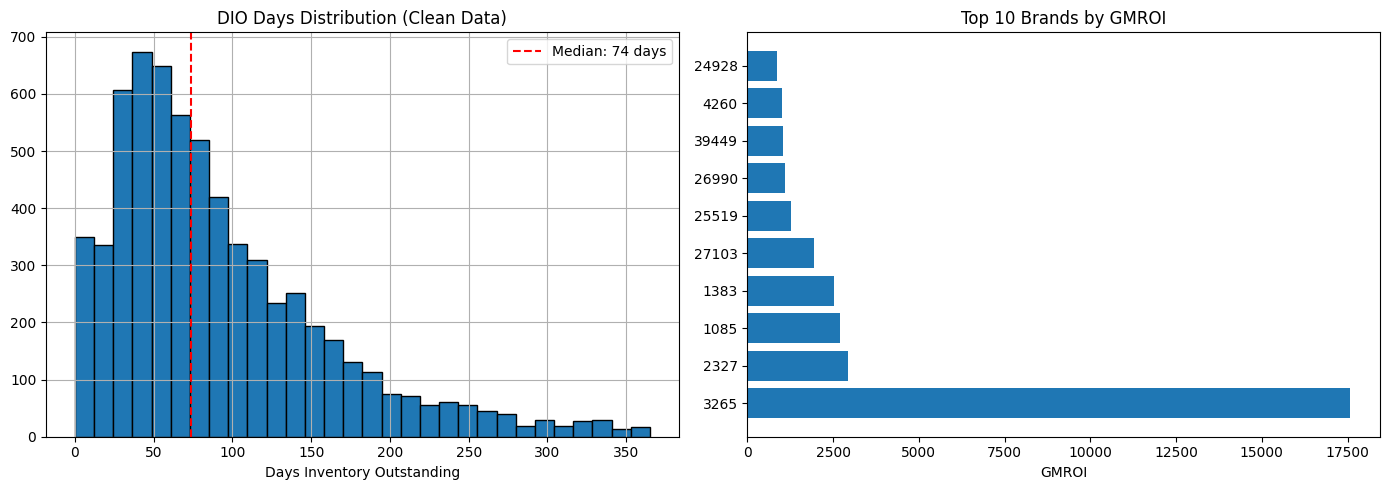

In [104]:
# Quick visualization for portfolio
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# DIO distribution
inventory_clean['DIO_Days'].hist(bins=30, ax=axes[0], edgecolor='black')
axes[0].axvline(inventory_clean['DIO_Days'].median(), color='red', 
                linestyle='--', label=f"Median: {inventory_clean['DIO_Days'].median():.0f} days")
axes[0].set_title('DIO Days Distribution (Clean Data)')
axes[0].set_xlabel('Days Inventory Outstanding')
axes[0].legend()

# Top brands by GMROI
top_brands = inventory_clean.nlargest(10, 'GMROI')
top_brands['Brand'] = top_brands['Brand'].astype(str)  # Ensure Brand is string for better display
axes[1].barh(top_brands['Brand'], top_brands['GMROI'])
axes[1].set_title('Top 10 Brands by GMROI')
axes[1].set_xlabel('GMROI')

plt.tight_layout()
plt.show()

In [60]:
del inconsistent_vendornames,vnumsales_not_in_pp,vnumsales_not_in_pu,vnumpp_not_in_sales,sales_uniq_no,pp_uniq_no,unique_v_nos_in_pp,unique_v_nos_in_pu,unique_v_nos_in_vi